### Let's use the famous MNIST dataset (handwritten digits) for understanding classification techniques

In [2]:
#import the data from library
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [3]:
#sort the dataset to make sure our test set would contain all the classes 0,1,2,3,4,5,6,7,8,9
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [4]:
import numpy as np
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
sort_by_target(mnist) # fetch_openml() returns an unsorted dataset

In [5]:
X,y = mnist['data'],mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [7]:
some_digit = X[36000]
print(some_digit) ##see how the image is stored into 784 pixels (numerical values)
some_digit_image = some_digit.reshape(28,28) ##lets convert it into a matrix of 28rows*28columns = 784 pixels

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.  86. 131. 225. 225. 225.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.  13.  73. 197. 253. 252. 252. 252. 252.   0.   0.   0.   0.
   0. 

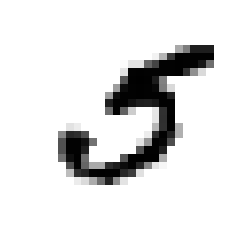

In [8]:
#plot the matrix to see what image would be formed based on these pixles.
#It's an Image of 5.
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis('off')
plt.show()

In [9]:
#target data confirms the same that it is 5
y[36000]

5

In [10]:
#split the dataset into train,test data
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000],y[60000:]

In [11]:
#lets shuffle the data in training set
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train,y_train = X_train[shuffle_index],y_train[shuffle_index]

In [12]:
#since this dataset has multiclass, let us now limit it to just one class to understand the concepts better.
#predict whether it is 5 or not 5
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

## train the SGD Classifier Model
SGD Classifier - Stochastic Gradient Descent

(see chapter 4 - Regression techniques to understand more about [Stochastic Gradient descent](https://github.com/dawoodhussain/DataScience-ML/blob/master/Chapter%204%20-%20Regression%20Techniques.ipynb) algorithm)

This classifier has the advantage of being capable of handling very large datasets efficiently. This is inpart because SGD deals with training instances independently, one at a time (which also makes SGD well suited for online learning).

In [13]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
## predict the model outputs
sgd_clf.predict([some_digit])

array([ True])

## Perfromance Measures for Classification Techniques
1. Measuring Accuracy using Cross-Validation
2. Confusion Matrix (precision score, recall score, F1 score)
3. the ROC curve
4. The ROC-AUC curve


### 1.  evaluating the model accuracy using Cross-Validation
The stratifiedKFold class performs Stratified sampling to produce folds that contain a representative ratio of each class. At each iteration the code creates a clone of the classifier, trains that clone on the training folds, and makes predictions on the test fold. Then it counts the number of correct predictions and outputs the ratio of correct predictions

In [15]:
#Implementing cross-validation from scratch to get accuracy score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3,random_state=42)

for train_index,test_index in skfolds.split(X_train,y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

0.96275
0.94485
0.95425


In [17]:
#implementing the same using Scikit-learn for accuracy score
#cv=3 means it creates 3 startified sample training folds & trains the algorithms 3 times
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.96275, 0.94485, 0.95425])

### Let's check if accuracy score is a preferred performance measure for classifiers or not

In [16]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(sekf,X):
        return np.zeros((len(X),1),dtype=bool)
        
never_5_clg = Never5Classifier()
cross_val_score(never_5_clg,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.9114 , 0.90775, 0.9098 ])

In [17]:
(len(y_train_5[y_train_5 == True])/len(y_train_5)) * 100

9.035

**the most dumb classifier is able to predict better 91%. This is true, beacuse there are only 10% of images that are 5. the data is more skewed here. so, accuracy is not generally preferred as performance measure for Classifiers**

### 2. Confusion matrix
A much better way to evaluate the performance of a classifier model is to look at the confusion metrics. The general idea is to count the number of times instances of class A are classified as class B.

I recommend you to understand [Confusion matrix](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)  concept first if you do not know it already.

just like cross_val_score() which gives accuracy_score, cross_Val_predict() performs K-fold cross-validaiton, but instead of returning the evaluation scores, it returns the predictions made on each test fold.

In [19]:
from sklearn.model_selection import cross_val_predict
y_train_predict = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_predict)

array([[54297,   282],
       [ 2481,  2940]], dtype=int64)

In [21]:
## A perfect classifier would have only true positives and true negatives, so its confusion matrix would have nonzero values only on its main diagonal

y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5,y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

### Precision, Recall or Sensitivity, F1-Score
Precision = TP/TP+FP

Recall/Sensitivity/True Positive Rate = TP/TP+FN

F1-Score = 2*Precision*Recall/(Precision+Recall)      (if you need a simple way to compare two classifiers)

The F1 score is the harmonic mean of Precision & recall. Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values. As a result, the classifier will only get a high F1 score if both recall & precision are high

### Precision/Recall trade-off:
Increasing Precision reduces recall, and vice versa. This is called Precision/recall tradeoff

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score
print(precision_score(y_train_5,y_train_predict))
print(recall_score(y_train_5,y_train_predict))
print(f1_score(y_train_5,y_train_predict))

0.8490070093457944
0.5362479247371333
0.6573205200678349


**SGDClassifier decision_function():**
    
for each instance, it computes a score based on decision function, and if that score is greater than threshold, it assigns the instance to the positive class, orelse it assigns it to the negative class.

PFB the example of how decision_function() works & computes score

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([66167.49287715])

In [ ]:
threshold=0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [ ]:
threshold = 200000000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [ ]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)
print(precisions)
print(recalls)
print(thresholds)

[0.09092586 0.09091062 0.09091214 ... 1.         1.         1.        ]
[1.00000000e+00 9.99815532e-01 9.99815532e-01 ... 3.68935621e-04
 1.84467810e-04 0.00000000e+00]
[-1834542.92644196 -1833993.78935511 -1833768.31559653 ...
   867771.86119374   872005.49422336   885018.693294  ]


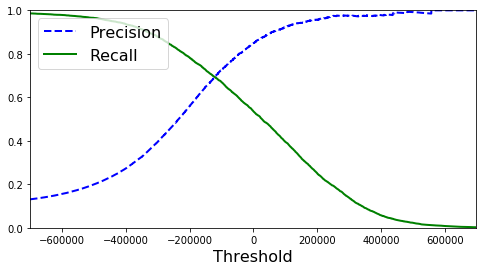

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
#plt.save_fig("precision_recall_vs_threshold_plot")
plt.show()

### 3. The ROC curve
Receiver Operating Characteristic curve.

It is very similar to the above precision/recall curve, but instead of plotting precision-vs-recall, the ROC curve plots the true positive rate (also called as TPR or recall) -vs- False positive rate (also called as 1- specifity or 1- True negative rate).

Understand clear picture of ROC & AUC metrics from [this link](https://towardsdatascience.com/understanding-the-roc-and-auc-curves-a05b68550b69)

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train_5, y_scores)

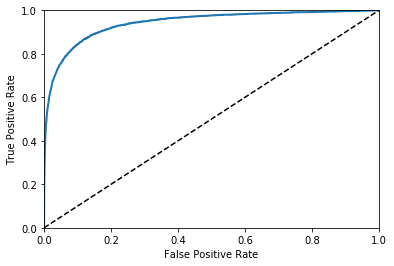

In [ ]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr,tpr)
plt.show()

### 4. The ROC-AUC Curve
it is Recevier operating Characteristic-Area under the curve ([ROC-AUC](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)) Curve.

A perfect classifer will have a ROC AUC eqaul to 1, whereas purely random classifier will have ROC AUC equal to 0.5

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9420793686518467

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method="predict_proba")

C:\Users\msdaw\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\msdaw\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\msdaw\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest,tpr_forest,thresholds_forest = roc_curve(y_train_5,y_scores_forest)

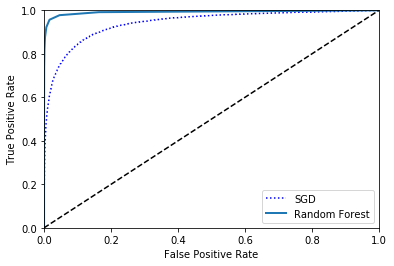

In [ ]:
plt.plot(fpr,tpr,"b:",label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc_score(y_train_5,y_scores_forest)

0.9922359597829687

In [ ]:
y_train_pred_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3)
print(precision_score(y_train_5,y_train_pred_forest))
recall_score(y_train_5,y_train_pred_forest)

C:\Users\msdaw\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\msdaw\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\msdaw\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.986432384341637


0.8181147389780483

## multiclass classification one-vs-one OR one-vs-all
Whereas binary classifiers distinguish between two classes, Multiclass classifiers (also called as Multinomial classifiers) distinguish betweem more than two classes. 

example MNIST dataset output (0,1,2,3,4,5,6,7,8,9)

if there are N classes, you need to train N*(N-1)/2 classifiers in one-vs-one strategy.

**Scikit-learn detects when you try to use a binary classification algorithm for a multiclass classification task, and it automatically runs One-vs-All (except for SVM classifiers for which it uses One-vs-one)**.

In [ ]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([5], dtype=int8)

In [ ]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-153321.04584624, -446618.68771464, -333198.83350645,
        -228602.0556544 , -396819.89684809,   66167.49287715,
        -646139.89367604, -394485.74136839, -694528.50342446,
        -489267.10103289]])

In [ ]:
np.argmax(some_digit_scores)

5

In [ ]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [ ]:
sgd_clf.classes_[5]

5

In [ ]:
forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit])

C:\Users\msdaw\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([5], dtype=int8)

In [ ]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0.1, 0. , 0.9, 0. , 0. , 0. , 0. ]])

## you can improve accuracy score by simply scaling the inputs with StandardScaler()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring="accuracy")

array([0.91331734, 0.91119556, 0.90693604])

In [ ]:
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train,cv=3)
conf_mx = confusion_matrix(y_train,y_train_pred)
conf_mx

array([[5666,    2,   53,   18,   14,   44,   52,    5,   58,   11],
       [   2, 6340,   85,   27,    8,   40,   46,    5,  163,   26],
       [  42,   89, 5107,  190,   48,   32,  129,   58,  236,   27],
       [  37,   22,  257, 5081,   24,  297,   54,   51,  182,  126],
       [  15,   20,   85,   13, 5384,   18,   59,    8,   25,  215],
       [  55,   18,   74,  205,   93, 4441,  162,   18,  253,  102],
       [  37,    9,   72,    9,   56,   91, 5605,    4,   33,    2],
       [  27,   35,   94,   76,  130,   10,    8, 5205,   53,  627],
       [  39,  130,  232,  142,  152,  407,  102,   27, 4462,  158],
       [  45,   16,  125,   76,  403,   59,    4,  224,   49, 4948]],
      dtype=int64)

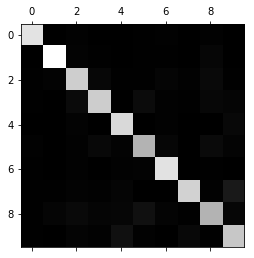

In [ ]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx/row_sums

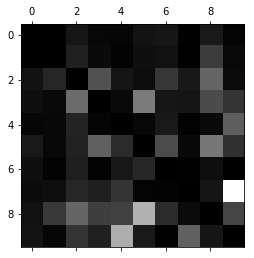

In [ ]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

In [ ]:
print(row_sums)

[[5923]
 [6742]
 [5958]
 [6131]
 [5842]
 [5421]
 [5918]
 [6265]
 [5851]
 [5949]]


# Multilabel classification - Example

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train%2 == 1)
y_multilabel = np.c_[y_train_large,y_train_odd]
print(y_multilabel)

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

[[False False]
 [ True  True]
 [False  True]
 ...
 [ True False]
 [False False]
 [ True  True]]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
##compute the average F1 score across all labels
y_train_knn_pred = cross_val_predict(knn_clf,X_train,y_train,cv=3)
f1_score(y_train,y_train_knn_pred, average="macro")